# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Regularization and Overfitting issues Homework

The aim of this homework is to check whether a given model overfits and apply strategies to avoid such behaviour.

### Import libraries

In [1]:
!pip install ipywidgets

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

from utils import helpers_Garden as hg
from utils.plottings import plot_learning_curve


# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Read dataset

We are going to read a simple dataset.
This is the famous titanic dataset, you already met.

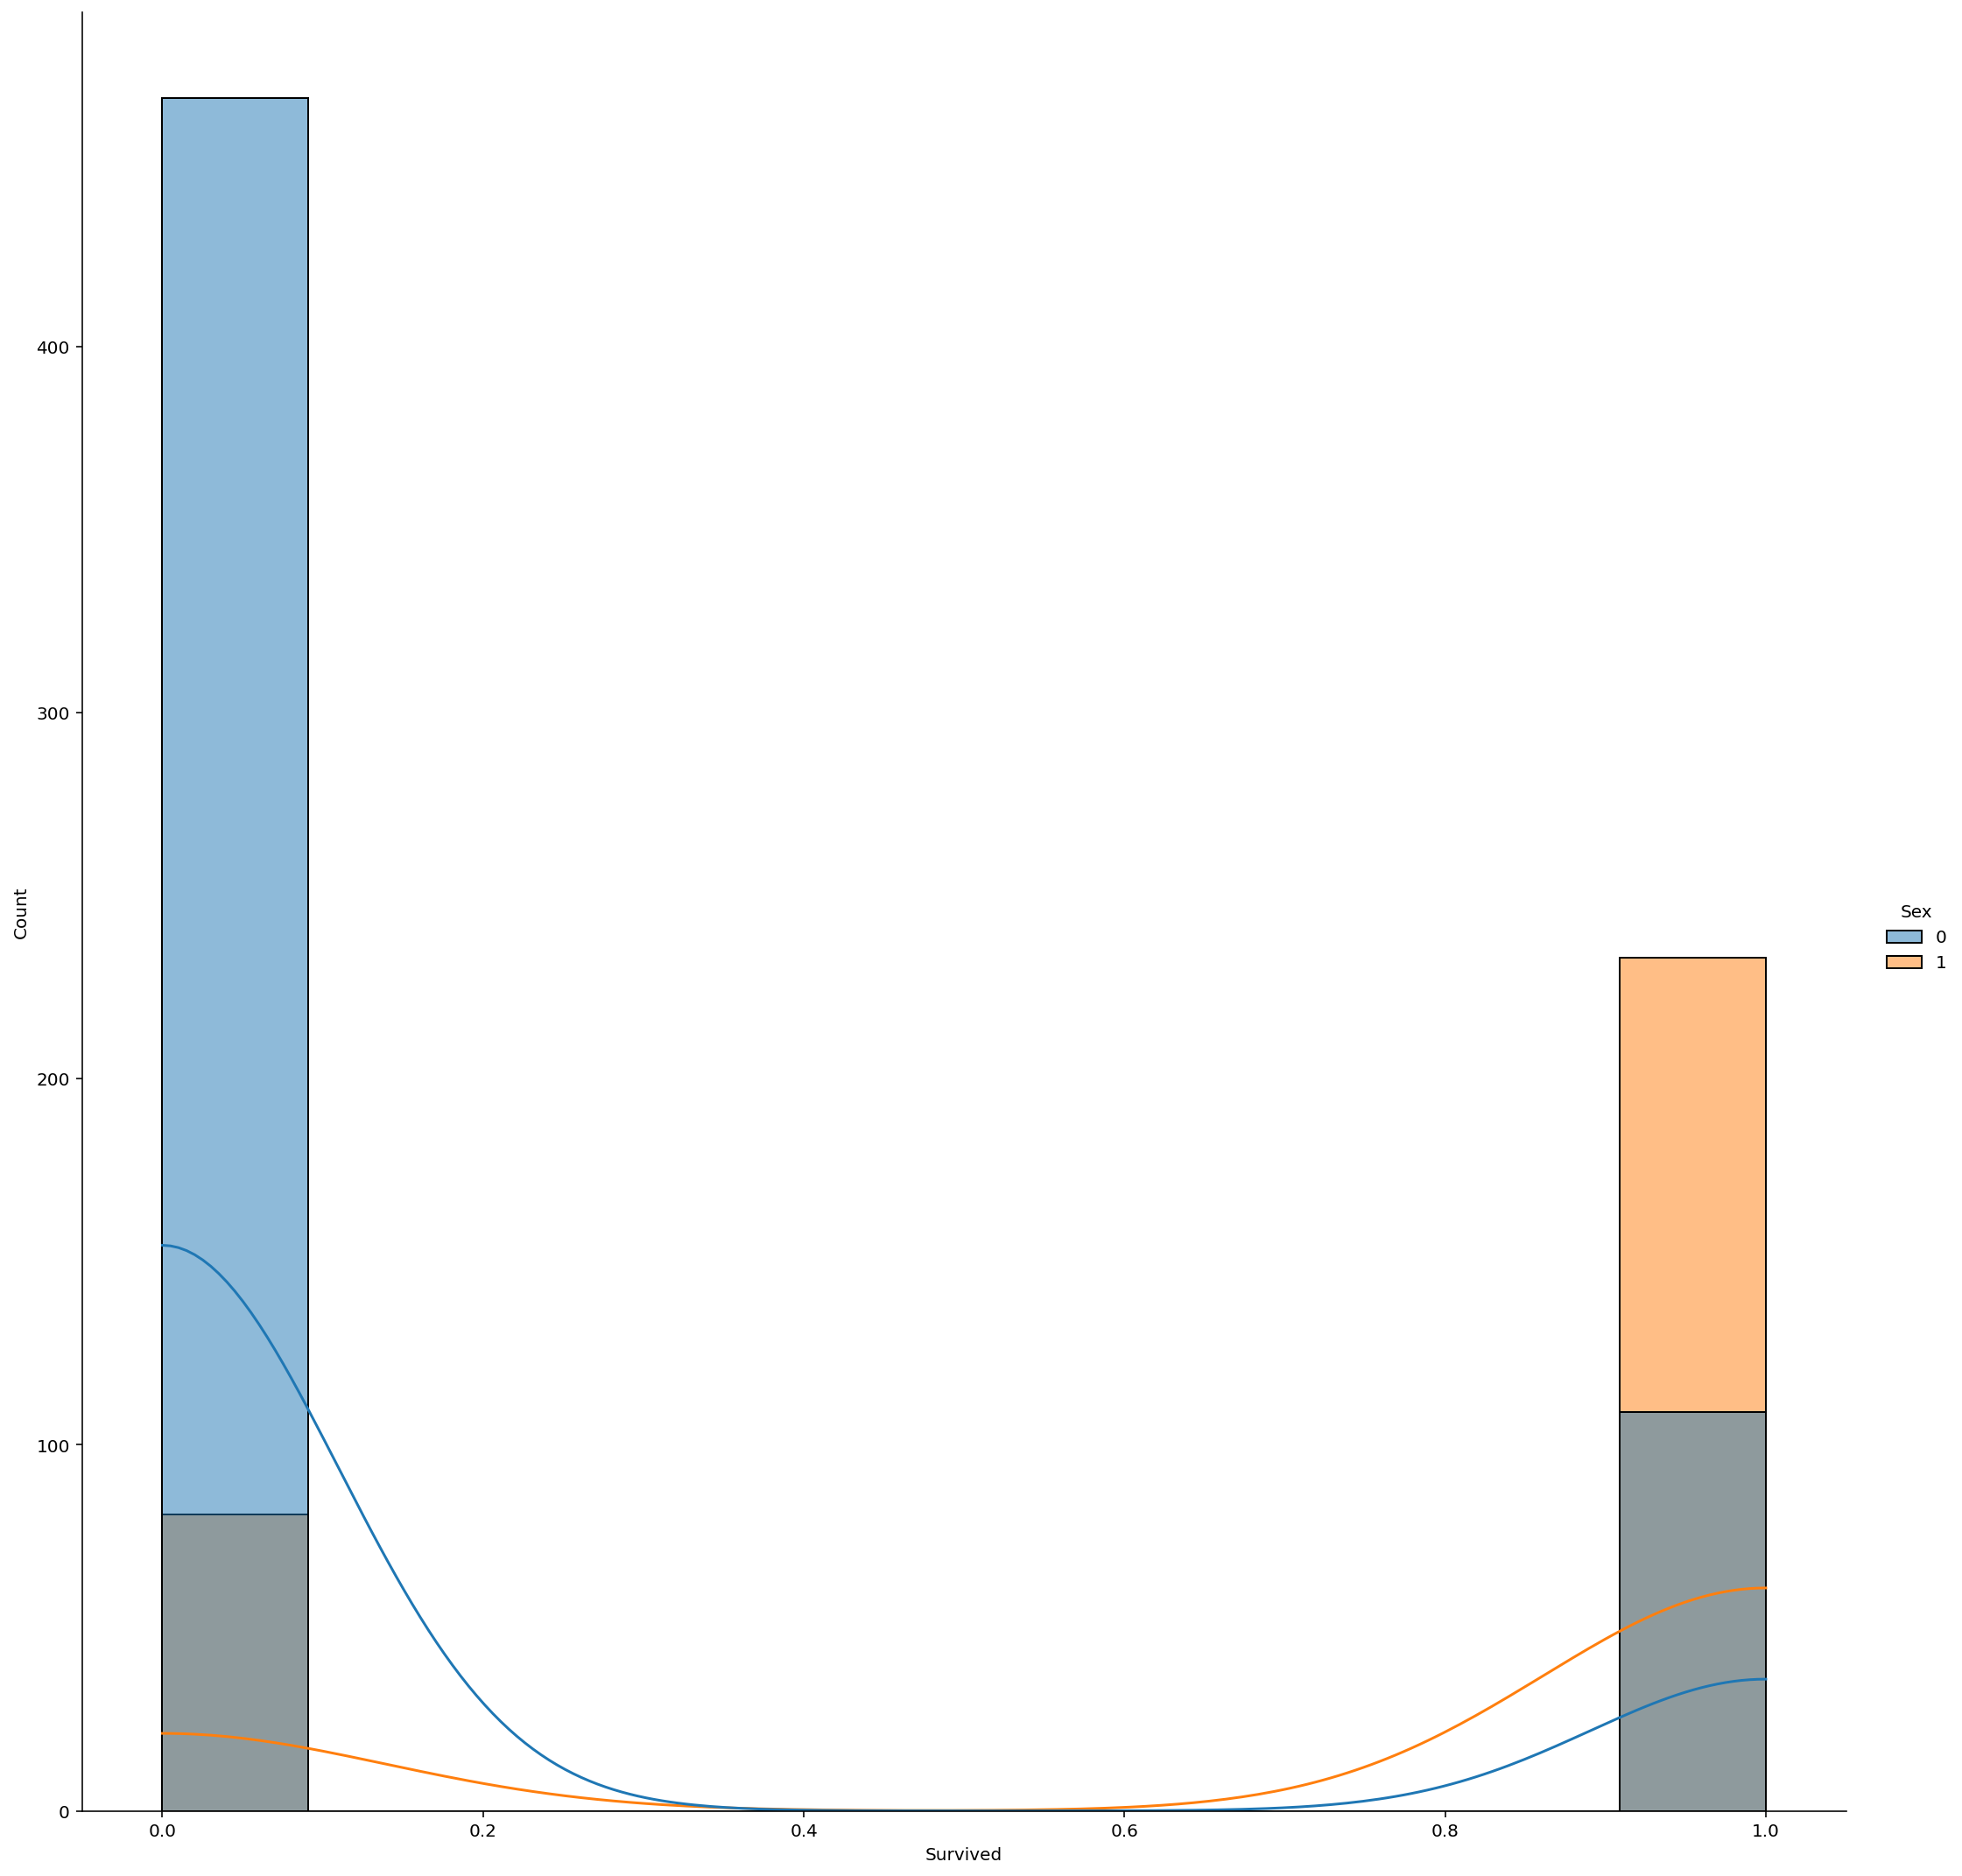

In [3]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

sns.displot(data=df, x="Survived", kde=True, hue="Sex", height=15);

In [4]:
features = ['Pclass', 'Fare', 'Sex', 'Parch']
X = df[features]
y = df['Survived']

## Gini Impurity and Entropy

We have seen that in algorithm based on trees, we look for the best split. 
The term “best” split means that after split, the two branches are more “ordered” than any other possible split.
How do we define more ordered? 
It depends on which metric we choose.
In general, there are two types of metric: _Gini impurity_ and _entropy_. 
These metrics are disorder metrics, that is the smaller these metrics are, the more “ordered” the dataset is.

$$ \mathcal{G} = 1 - \sum_j p^2_j \, . $$

$$ \mathcal{S} = - \sum_j p_j \log p_j \, . $$

The difference between the two metrics is pretty subtle and we are not interested in it for the time being.
To learn more, you may read this excellent [post](https://quantdare.com/decision-trees-gini-vs-entropy/). 
In most applications, both metric behave similarly. 

Complete the code below to calculate each metric.

In [5]:
def gini_impurity(y):
    """Function to calculate Gini impurity."""
    m = y.shape[0]
    cnts = dict(zip(*np.unique(y, return_counts = True)))
    impurity = 1 - sum((cnt/m)**2 for cnt in cnts.values())
    return impurity

def entropy(y):
    """Function to calculate Entropy."""
    m = y.shape[0]
    cnts = dict(zip(*np.unique(y, return_counts = True)))
    entr =  - sum((cnt/m)*(np.log(cnt/m)) for cnt in cnts.values())
    return entr

### Train and test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Homework Assignements

1. Define and train decision tree models, 
2. Play with hyperparameters and calculate the suitable metrics in order to verify whether the model overfits or underfits data.
3. Plot learning curves of your models by using the utils function `plot_learning_curve`.

---

### Your Work


In [7]:
# Decision Tree
mod = DecisionTreeClassifier()
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
print(mod.score(X_test,y_test))

0.770949720670391


In [8]:
# Scoring
print("Confusion and Classification Report")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Confusion and Classification Report
[[92 18]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



Confusion Matrix Heatmap Logistic Regresson


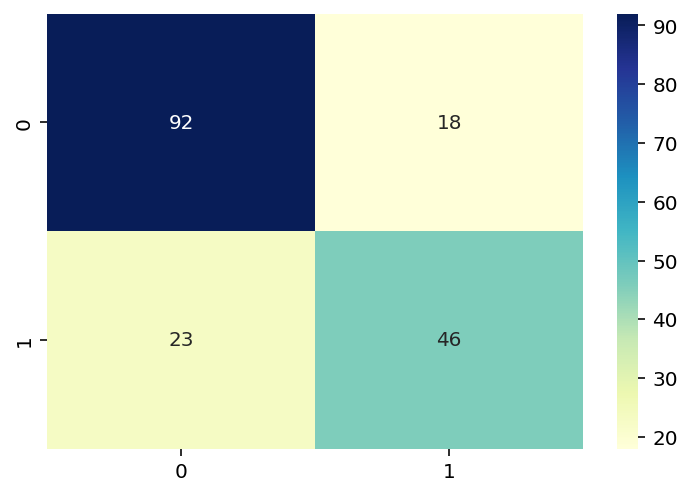

In [9]:
#Plot Confusion matrix
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")
print("Confusion Matrix Heatmap Logistic Regresson")

In [22]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score, KFold 

l_split = [2,5,8,10,15,20]

# Accuracy
for i in l_split:
    kf = KFold(n_splits=i, shuffle=True, random_state=42) 
    param_grid = {"max_depth": np.arange(2, 18, 1)} 

    mod_cv = GridSearchCV(mod, param_grid, cv=kf) 
    mod_cv.fit(X_train, y_train) 
    print(f"N split {i}:\nMiglior params: {mod_cv.best_params_}\nScore: {mod_cv.best_score_}")
    

N split 2:
Miglior params: {'max_depth': 3}
Score: 0.797752808988764
N split 5:
Miglior params: {'max_depth': 13}
Score: 0.8188712695754949
N split 8:
Miglior params: {'max_depth': 17}
Score: 0.8117977528089887
N split 10:
Miglior params: {'max_depth': 13}
Score: 0.8287363067292646
N split 15:
Miglior params: {'max_depth': 12}
Score: 0.8275118203309694
N split 20:
Miglior params: {'max_depth': 16}
Score: 0.8262301587301588


In [27]:
#gridsearch recall
l_split = [2,5,8,10,15,20]
for i in l_split:
    kf = KFold(n_splits=i, shuffle=True, random_state=42) 
    param_grid = {"max_depth": np.arange(2, 18, 1)} 

    mod_cv = GridSearchCV(mod, param_grid, scoring = 'recall', cv=kf) 
    mod_cv.fit(X_train, y_train) 
    print(f"N split {i}:\nMiglior params: {mod_cv.best_params_}\nScore: {mod_cv.best_score_}")


N split 2:
Miglior params: {'max_depth': 16}
Score: 0.6673107890499195
N split 5:
Miglior params: {'max_depth': 13}
Score: 0.727398153559755
N split 8:
Miglior params: {'max_depth': 13}
Score: 0.6951077497952498
N split 10:
Miglior params: {'max_depth': 15}
Score: 0.7318052413273002
N split 15:
Miglior params: {'max_depth': 12}
Score: 0.7389609734053804
N split 20:
Miglior params: {'max_depth': 13}
Score: 0.7347192513368984


In [29]:
#Precision
for i in l_split:
    kf = KFold(n_splits=i, shuffle=True, random_state=42) 
    param_grid = {"max_depth": np.arange(2, 18, 1)} 

    mod_cv = GridSearchCV(mod, param_grid, scoring = "precision", cv=kf) 
    mod_cv.fit(X_train, y_train) 
    print(f"N split {i}:\nMiglior params: {mod_cv.best_params_}\nScore: {mod_cv.best_score_}")
  

N split 2:
Miglior params: {'max_depth': 3}
Score: 0.8372544787394777
N split 5:
Miglior params: {'max_depth': 4}
Score: 0.8264382307860568
N split 8:
Miglior params: {'max_depth': 4}
Score: 0.8283393458393458
N split 10:
Miglior params: {'max_depth': 2}
Score: 0.8331582214082214
N split 15:
Miglior params: {'max_depth': 2}
Score: 0.8188553712083124
N split 20:
Miglior params: {'max_depth': 2}
Score: 0.8397710622710622


In [30]:
#Massimizziamo la Recall
mod_agg = DecisionTreeClassifier(max_depth=12)
mod_agg.fit(X_train,y_train)
pred_agg = mod_agg.predict(X_test)
print(mod_agg.score(X_test,y_test))
print(classification_report(y_test, pred_agg))

0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



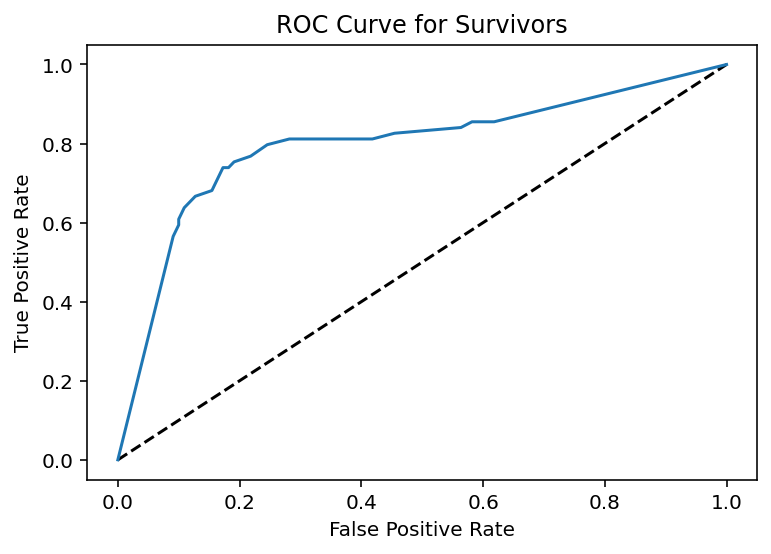

ROC score:  0.7966403162055337


In [43]:
# Generate ROC curve values: fpr, tpr, thresholds 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
y_pred_probs = mod_agg.predict_proba(X_test) [:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs) 

plt.plot([0, 1], [0, 1],'k--') 
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve for Survivors') 
plt.show() 

from sklearn.metrics import roc_auc_score 
print("ROC score: ",roc_auc_score(y_test, y_pred_probs))

<module 'matplotlib.pyplot' from '/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/pyplot.py'>

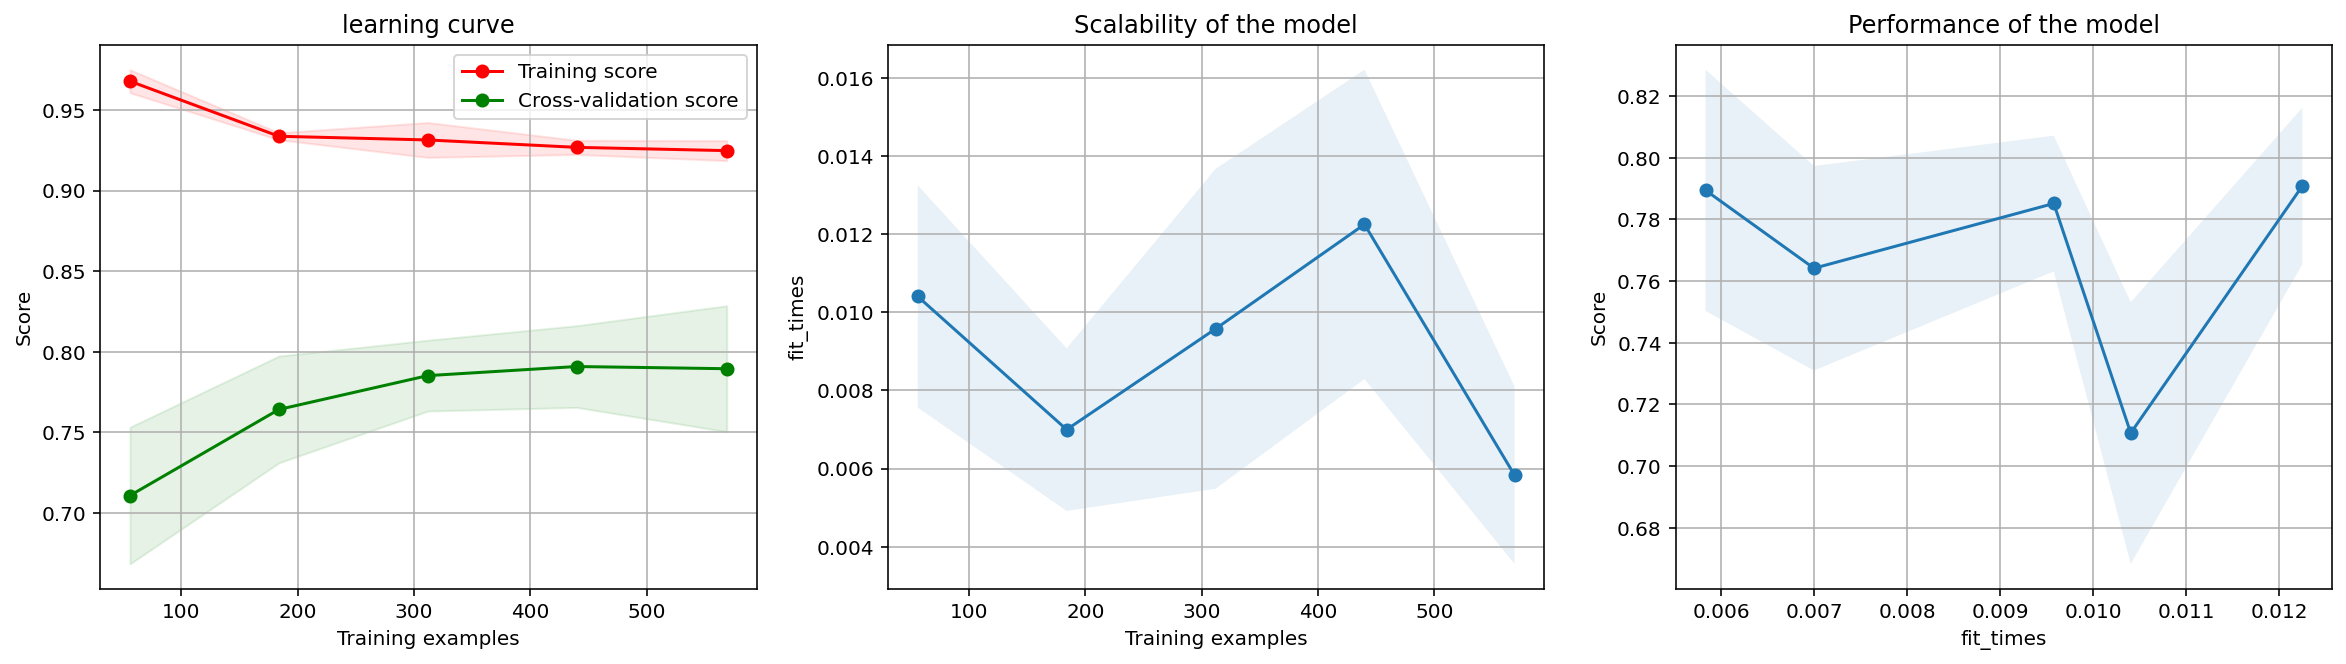

In [62]:
plot_learning_curve(DecisionTreeClassifier(max_depth=12), 'learning curve', X_train, y_train)

In [55]:
from sklearn.model_selection import validation_curve

In [59]:
max_depth = [1, 5, 10, 12, 15, 20, 25]
train_scores, test_scores = validation_curve(
    mod, X, y, param_name="max_depth", param_range=max_depth,
    cv=kf, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

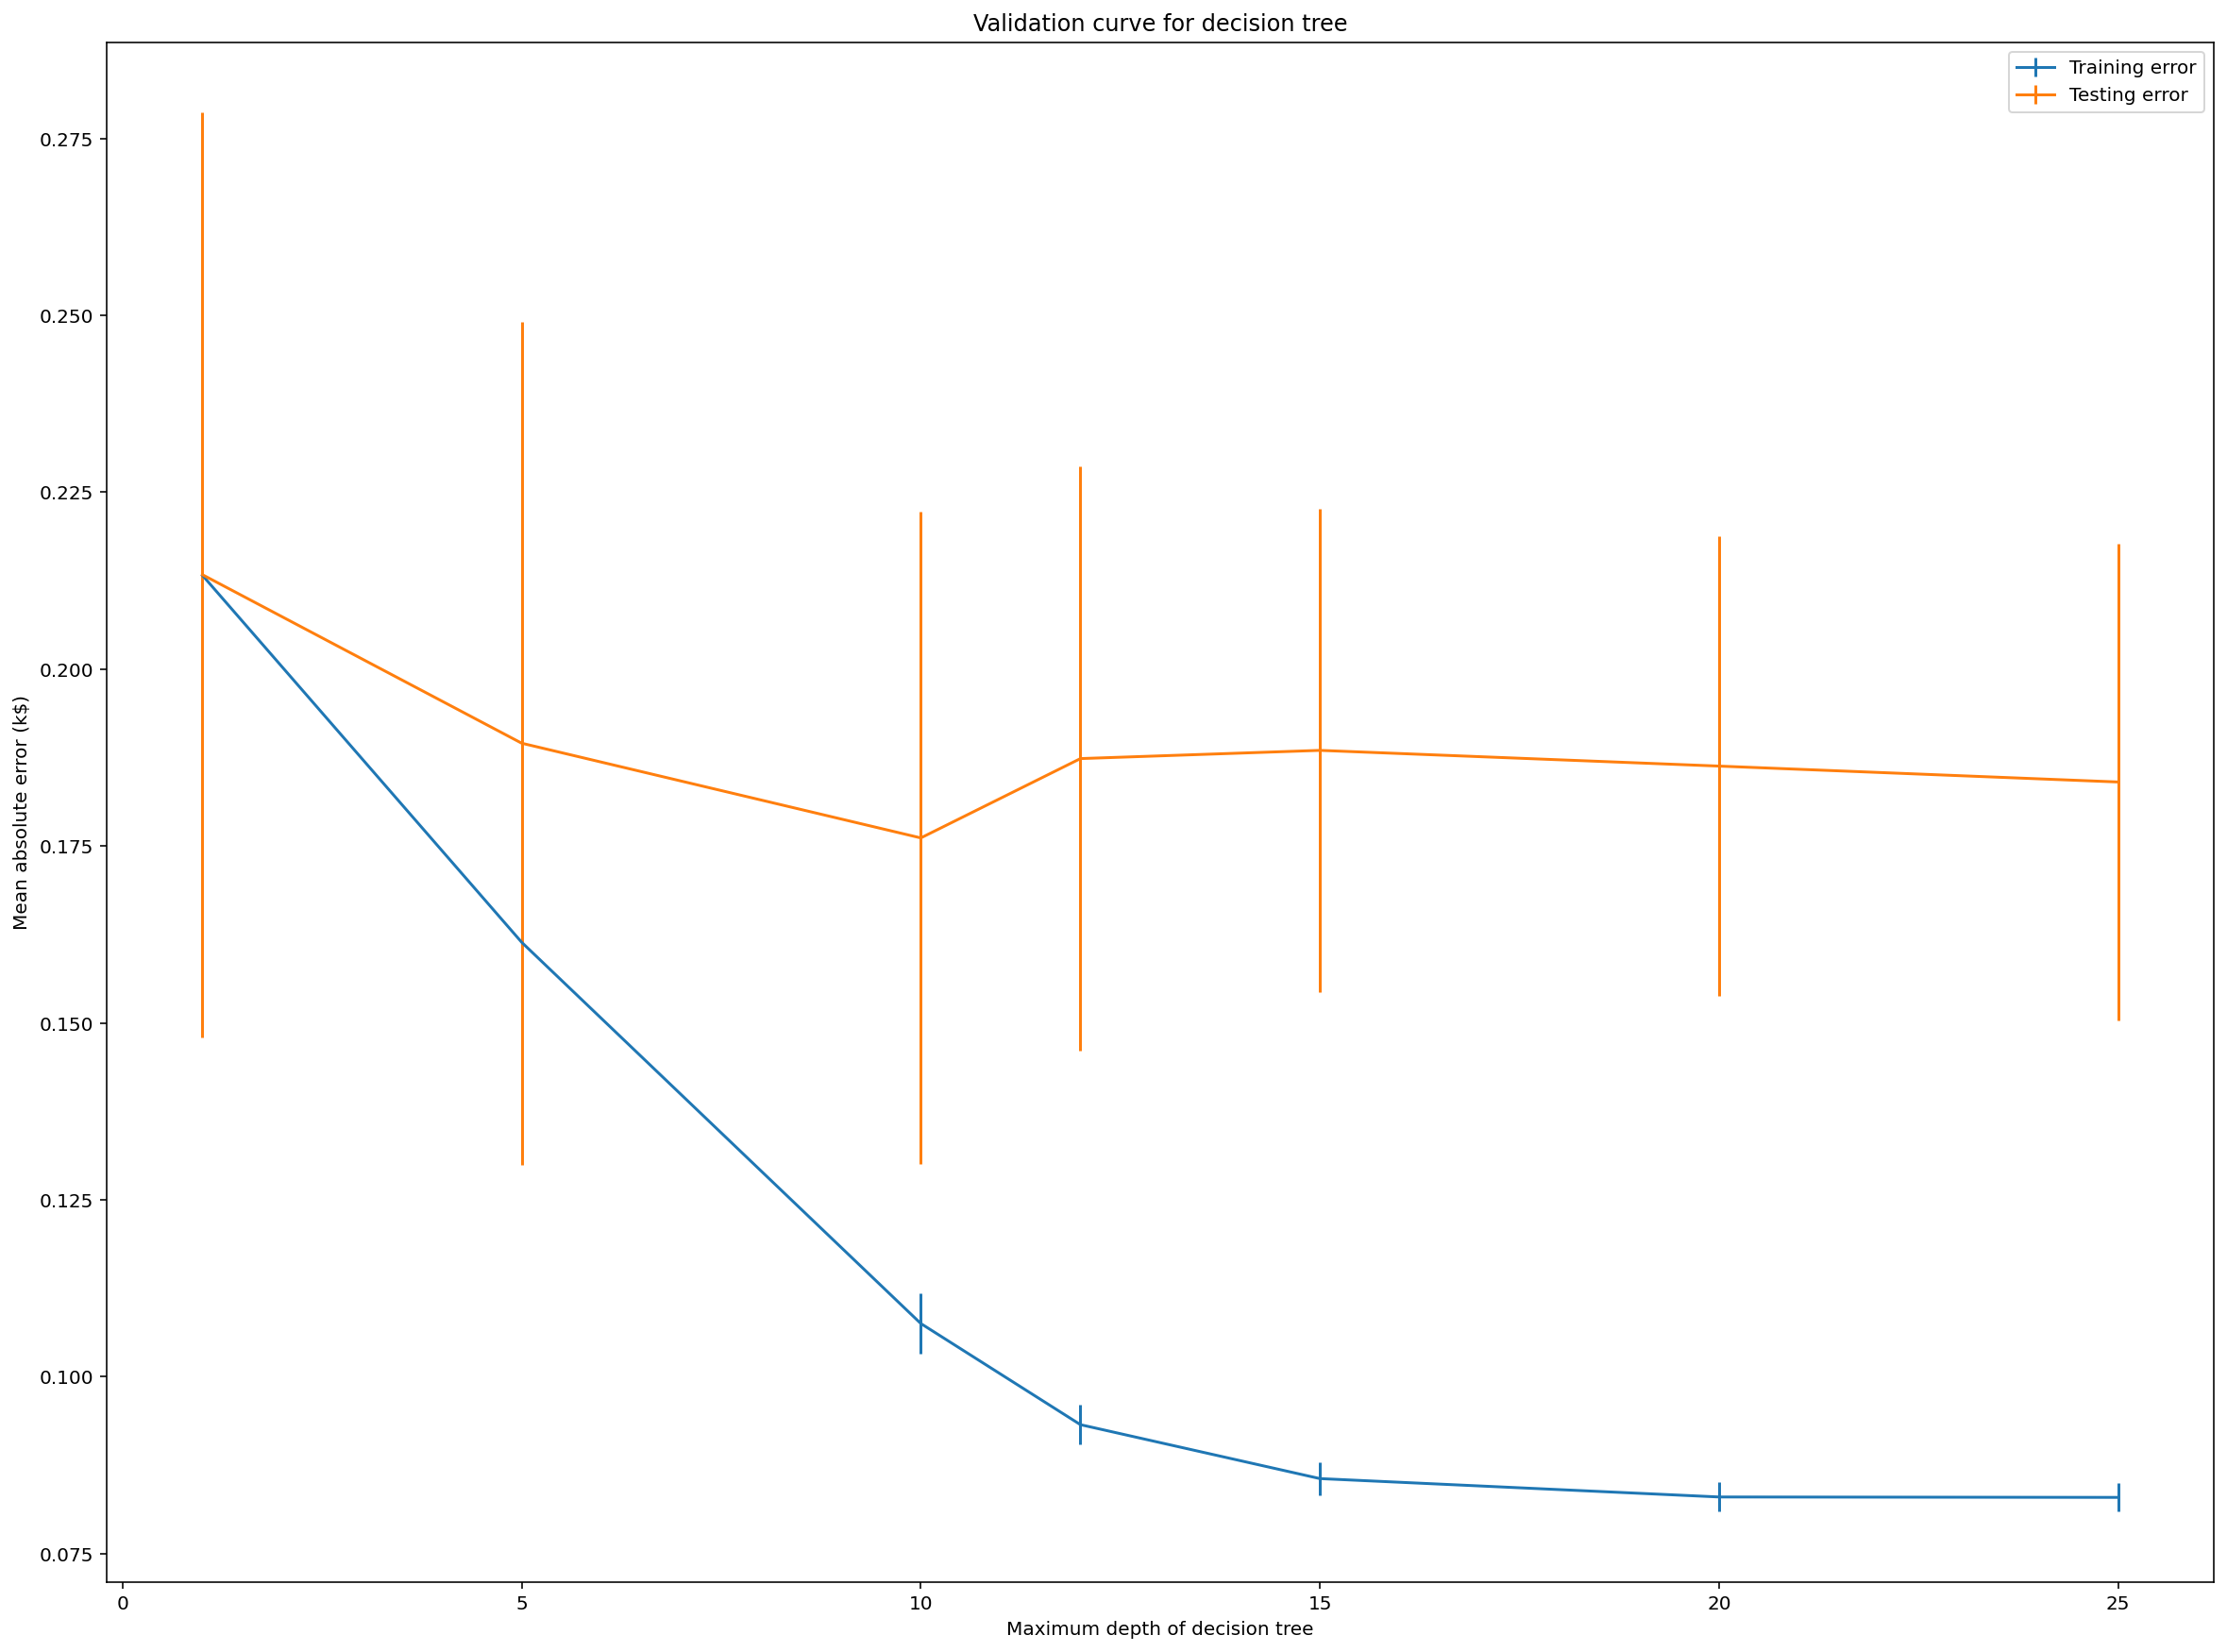

In [60]:
plt.figure(figsize=(20,15))
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
plt.title("Validation curve for decision tree");

<module 'matplotlib.pyplot' from '/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/pyplot.py'>

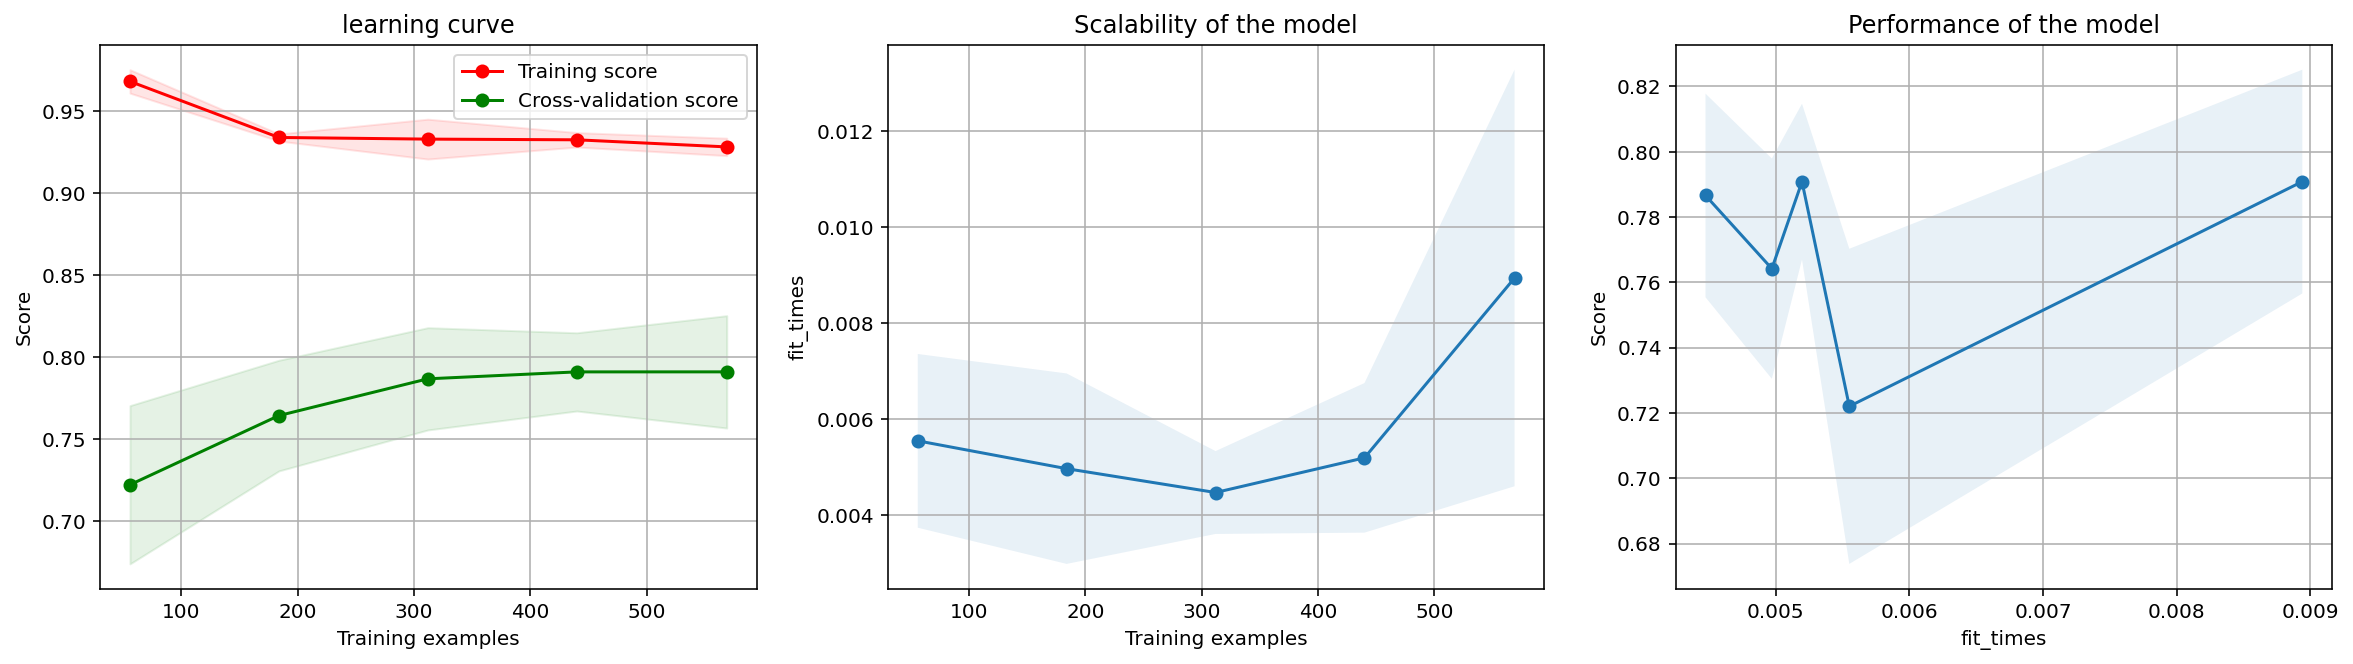

In [61]:
plot_learning_curve(DecisionTreeClassifier(max_depth=15), 'learning curve' , X_train, y_train)

<module 'matplotlib.pyplot' from '/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/pyplot.py'>

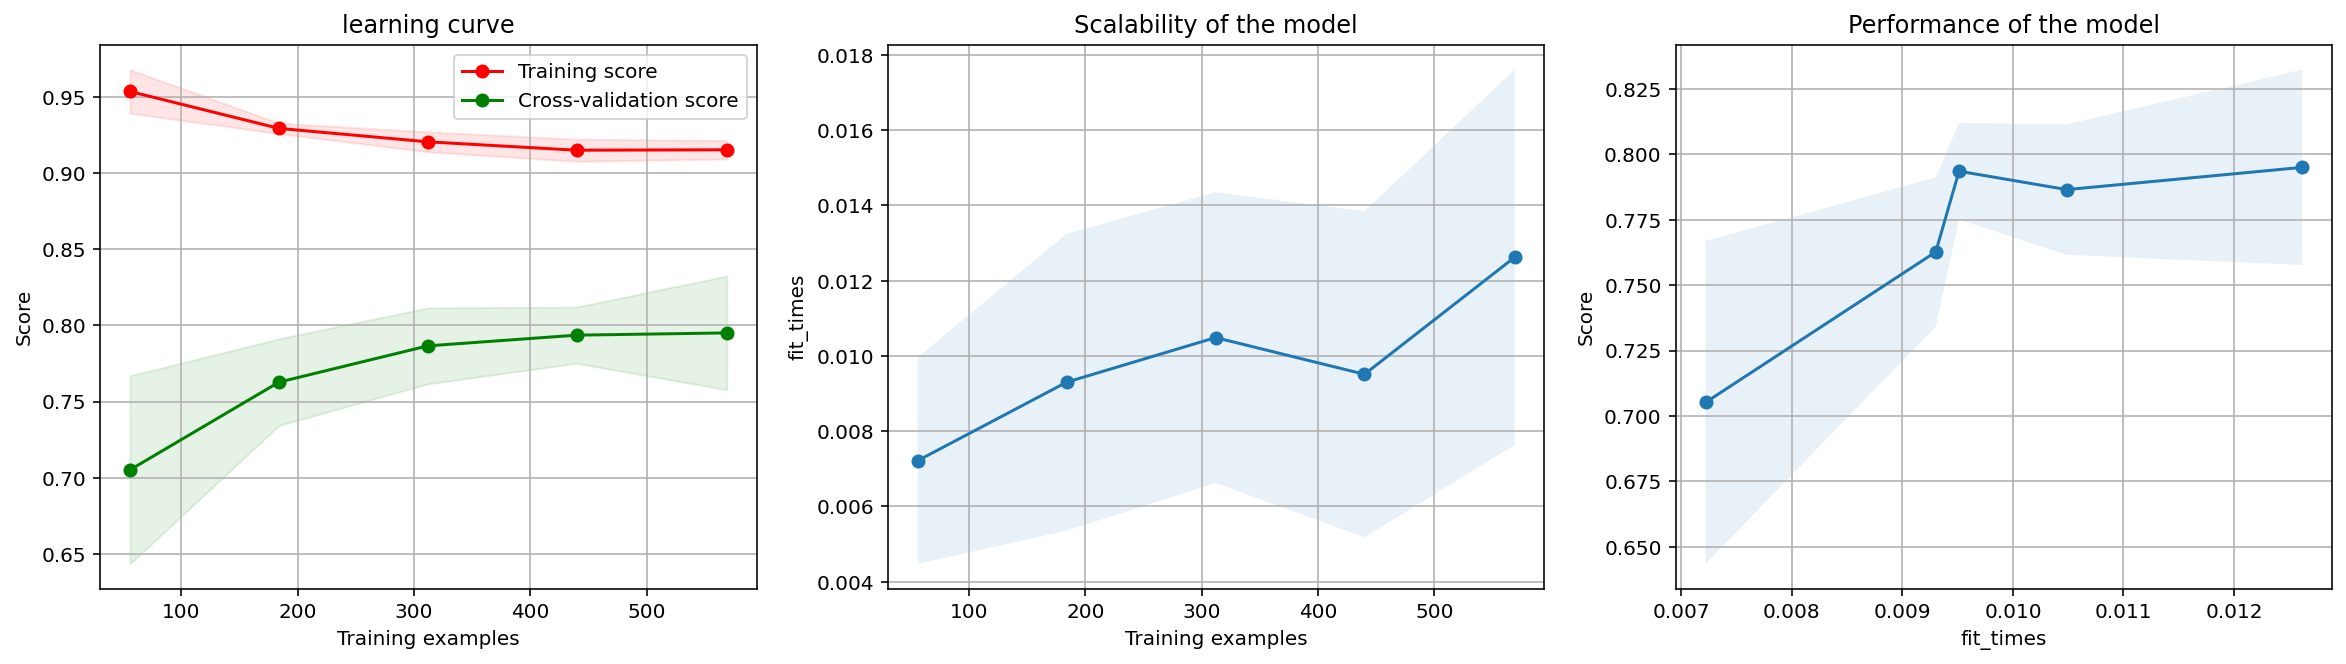

In [63]:
plot_learning_curve(DecisionTreeClassifier(max_depth=10), 'learning curve' , X_train, y_train)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b194fa27-21e4-4aec-8e61-11df9c4b8d6c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>